# 02 - Data Cleaning

## Objectives

   * Handle missing values
   * Clean data for further analysis

## Inputs

* outputs/datasets/collection/house_data.csv

## Outputs

* outputs/datasets/cleaned/TestSetCleaned.csv
* outputs/datasets/cleaned/TrainSetCleaned.csv
* Data cleaning pipeline


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with `os.getcwd()`
* We get the parent folder with `os.path.dirname(...)`
* We set the new working directory with `os.chdir(...)`

In [2]:
import os
current_dir = os.getcwd()
os.chdir(os.path.dirname(current_dir))
print(f"Current directory: {os.getcwd()}")

Current directory: /workspace/heritage-housing-issues


# Load Data

In [3]:
import pandas as pd
df = pd.read_csv('outputs/datasets/collection/house_data.csv', index_col=0)
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


---

# Data Exploration

We want to explore the data in a little more detail. First, let's remind ourselves what each feature means.

|Variable|Meaning|Units|
|:----|:----|:----|
|1stFlrSF|First Floor square feet|334 - 4692|
|2ndFlrSF|Second-floor square feet|0 - 2065|
|BedroomAbvGr|Bedrooms above grade (does NOT include basement bedrooms)|0 - 8|
|BsmtExposure|Refers to walkout or garden level walls|Gd: Good Exposure; Av: Average Exposure; Mn: Minimum Exposure; No: No Exposure; None: No Basement|
|BsmtFinType1|Rating of basement finished area|GLQ: Good Living Quarters; ALQ: Average Living Quarters; BLQ: Below Average Living Quarters; Rec: Average Rec Room; LwQ: Low Quality; Unf: Unfinshed; None: No Basement|
|BsmtFinSF1|Type 1 finished square feet|0 - 5644|
|BsmtUnfSF|Unfinished square feet of basement area|0 - 2336|
|TotalBsmtSF|Total square feet of basement area|0 - 6110|
|GarageArea|Size of garage in square feet|0 - 1418|
|GarageFinish|Interior finish of the garage|Fin: Finished; RFn: Rough Finished; Unf: Unfinished; None: No Garage|
|GarageYrBlt|Year garage was built|1900 - 2010|
|GrLivArea|Above grade (ground) living area square feet|334 - 5642|
|KitchenQual|Kitchen quality|Ex: Excellent; Gd: Good; TA: Typical/Average; Fa: Fair; Po: Poor|
|LotArea| Lot size in square feet|1300 - 215245|
|LotFrontage| Linear feet of street connected to property|21 - 313|
|MasVnrArea|Masonry veneer area in square feet|0 - 1600|
|EnclosedPorch|Enclosed porch area in square feet|0 - 286|
|OpenPorchSF|Open porch area in square feet|0 - 547|
|OverallCond|Rates the overall condition of the house|10: Very Excellent; 9: Excellent; 8: Very Good; 7: Good; 6: Above Average; 5: Average; 4: Below Average; 3: Fair; 2: Poor; 1: Very Poor|
|OverallQual|Rates the overall material and finish of the house|10: Very Excellent; 9: Excellent; 8: Very Good; 7: Good; 6: Above Average; 5: Average; 4: Below Average; 3: Fair; 2: Poor; 1: Very Poor|
|WoodDeckSF|Wood deck area in square feet|0 - 736|
|YearBuilt|Original construction date|1872 - 2010|
|YearRemodAdd|Remodel date (same as construction date if no remodelling or additions)|1950 - 2010|
|SalePrice|Sale Price|34900 - 755000|


In [3]:
from pandas_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Missing Values

As we can see from the profiling report, a number of features have missing data. Let's visualise the percentages of each to better understand how to deal with them.

2ndFlrSF          5.890411
BedroomAbvGr      6.780822
BsmtFinType1      7.808219
EnclosedPorch    90.684932
GarageFinish     11.095890
GarageYrBlt       5.547945
LotFrontage      17.739726
MasVnrArea        0.547945
WoodDeckSF       89.383562
dtype: float64


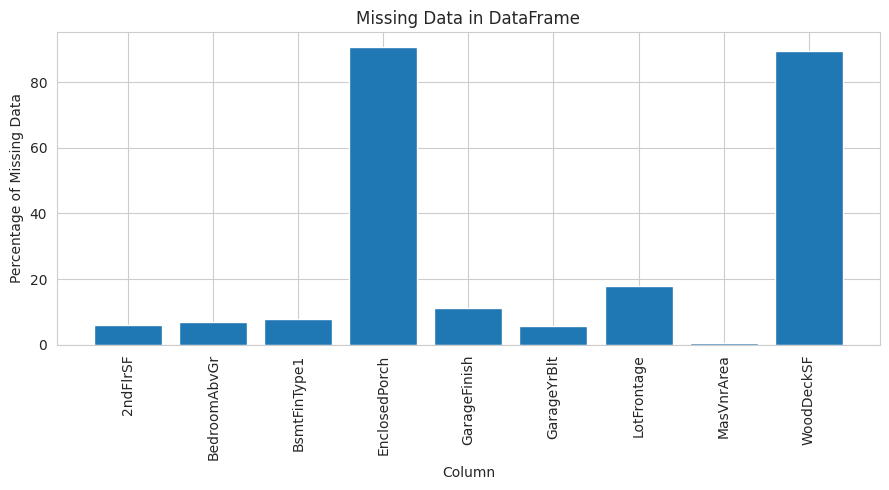

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set_style('whitegrid')


def plot_percentage_missing(df):
    df_cols_with_missing_data = df[df.columns[df.isna().sum() > 0]]

    # Calculating the mean of a series of booleans gives the ratio of True values
    missing_data = df_cols_with_missing_data.isna().mean() * 100

    print(missing_data)

    fig, ax = plt.subplots(figsize=(9, 5))
    ax.bar(x=missing_data.index, height=missing_data.values)
    ax.set_xlabel("Column")
    ax.set_ylabel("Percentage of Missing Data")
    ax.set_title("Missing Data in DataFrame")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

plot_percentage_missing(df)

EnclosedPorch and WoodDeckSF have approximately 90% of data missing. It's probably safe to drop these features, but let's plot the values we have of these columns to see if there's anything else we can do.

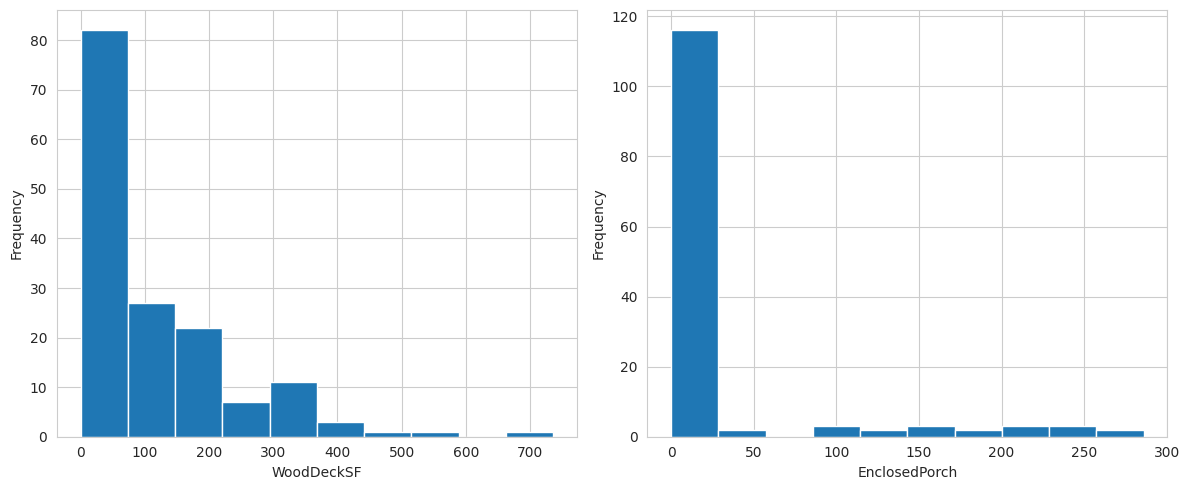

In [4]:
wood_deck_sf = df['WoodDeckSF'].dropna()
enclosed_porch = df['EnclosedPorch'].dropna()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

axes[0].hist(wood_deck_sf)
axes[0].set_xlabel('WoodDeckSF')
axes[0].set_ylabel('Frequency')

axes[1].hist(enclosed_porch)
axes[1].set_xlabel('EnclosedPorch')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

We see that overwhelmingly the data we have is zeros. This adds very little to our analysis and is not expected to hold much predictive power, so we can drop these features.

For remaining numerical features, we will impute using either the mean or median value.

In order to assess which is more appropriate, we will plot a QQ plot and run a statistical normality test for each feature.

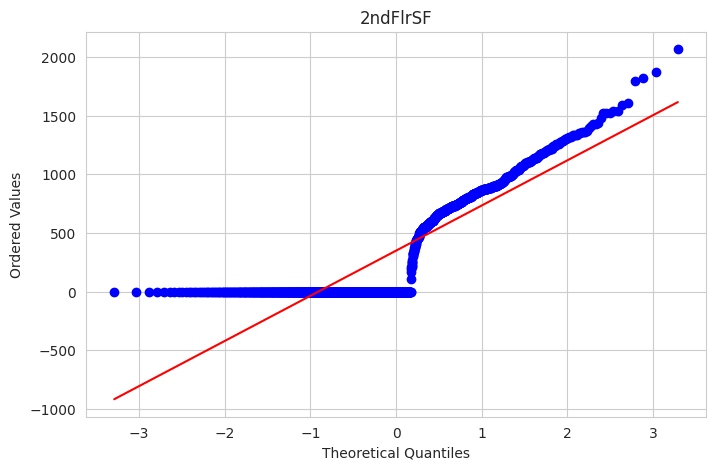

2ndFlrSF is not normally distributed (test statistic=0.7663, p-value=0.0000)


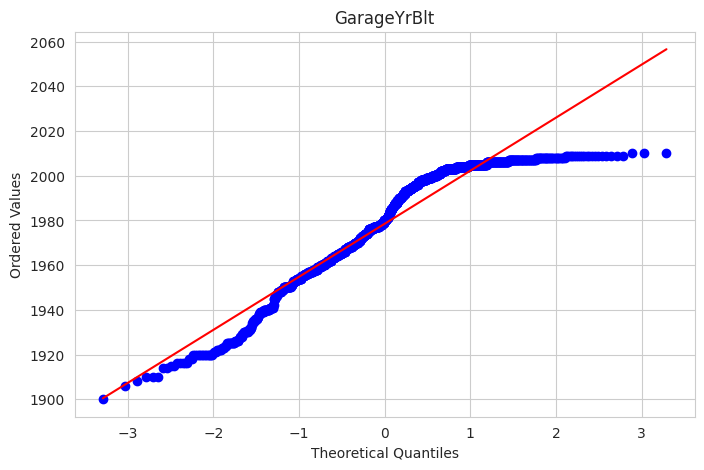

GarageYrBlt is not normally distributed (test statistic=0.9209, p-value=0.0000)


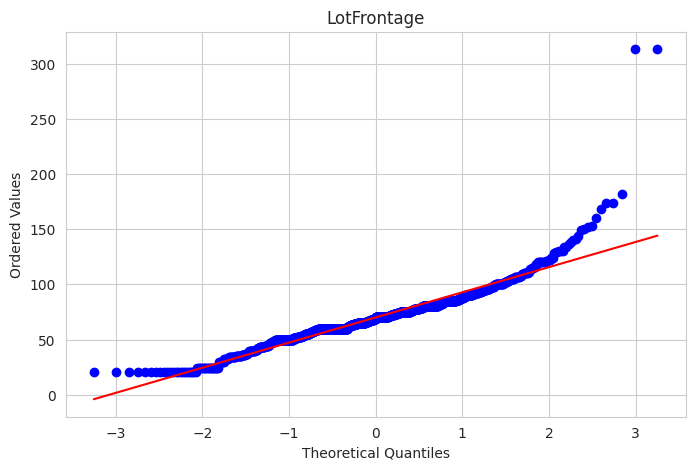

LotFrontage is not normally distributed (test statistic=0.8804, p-value=0.0000)


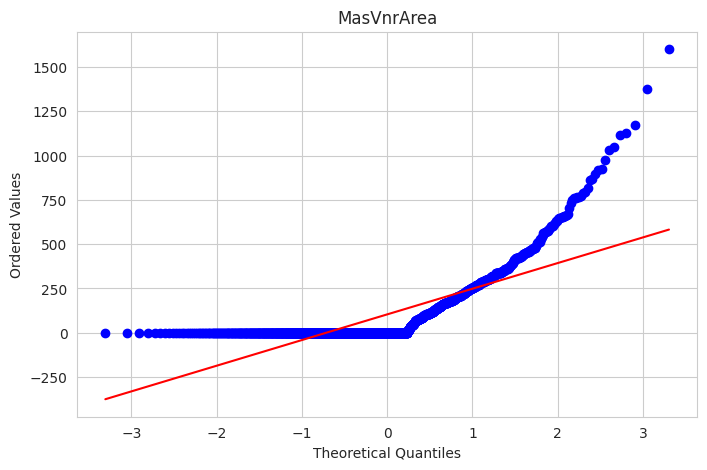

MasVnrArea is not normally distributed (test statistic=0.6393, p-value=0.0000)


In [56]:
from scipy.stats import shapiro
import numpy as np
import pingouin as pg

def plot_qq_and_normality(df, features):
    for feat in features:
        if not is_discrete_feature(df, feat):
            plt.figure(figsize=(8, 5))
            stats.probplot(df[feat].dropna(), dist="norm", plot=plt)
            plt.title(feat)
            plt.xlabel("Theoretical Quantiles")
            plt.ylabel("Ordered Values")
            plt.show()

            stat, pval, normal = pg.normality(df[feat].dropna(), alpha=0.05).T.to_numpy()
            if pval < 0.05:
                print(f"{feat} is not normally distributed (test statistic={stat[0]:.4f}, p-value={pval[0]:.4f})")
            else:
                print(f"{feat} is normally distributed (test statistic={stat[0]:.4f}, p-value={pval[0]:.4f})")

def is_discrete_feature(df, feat, tol=0.05):
    num_unique = df[feat].nunique()
    num_total = df[feat].count()
    if num_unique / num_total < tol:
        return True
    else:
        return False

def get_numeric_cols_with_missing(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    missing_cols = df[numeric_cols].isnull().sum()[df[numeric_cols].isnull().sum() > 0].index.tolist()
    return missing_cols

plot_qq_and_normality(df_dropped_na, get_numeric_cols_with_missing(df_dropped_na))

From the `pg.normality` test, and visually from the QQ plots, we can see that none of these variables are normally distributed. Therefore, we will use median imputation for each of them.

We will also use median imputation for BedroomAbvGr, as it is a discrete variable.

For categorical features, we will assume that missing data means that the intended observation was 'none', as it is difficult to determine what value should be imputed without running complex multivariate analysis.

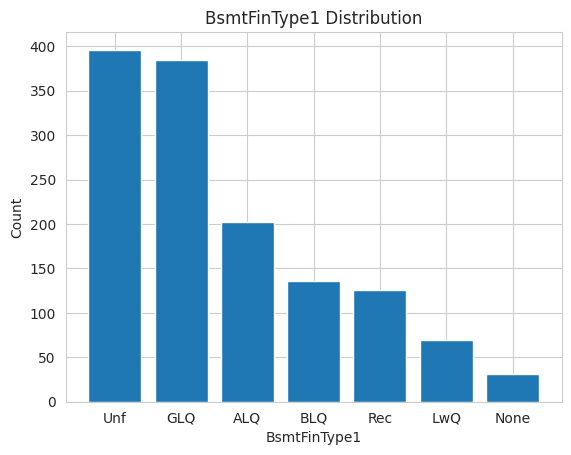

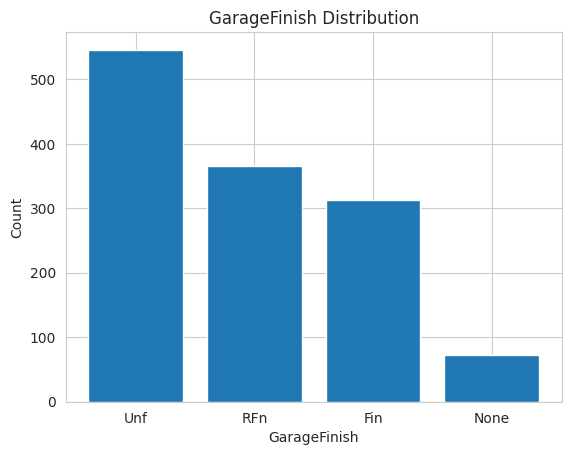

In [64]:
cat_cols = list(df.select_dtypes(include=['object']).columns)
cat_missing_cols = [col for col in cat_cols if df[col].isnull().any()]

for feat in cat_missing_cols:
    value_counts = df[feat].value_counts()
    plt.bar(value_counts.index, value_counts.values)

    plt.title(feat + ' Distribution')
    plt.xlabel(feat)
    plt.ylabel('Count')
    plt.show()

## Data Cleaning Summary

Drop Features
- WoodDeckSF
- EnclosedPorch

Median Imputation
- 2ndFlrSF
- GarageYrBlt
- LotFrontage
- MasVnrArea
- BedroomAbvGr

Categorical Imputation
- BsmtFinType1
- GarageFinish

## Split Train & Test Sets

In [18]:
from sklearn.model_selection import train_test_split
TrainSet, TestSet, _, __ = train_test_split(
                                        df,
                                        df['SalePrice'],
                                        test_size=0.2,
                                        random_state=42)

print(f"TrainSet shape: {TrainSet.shape} \nTestSet shape: {TestSet.shape}")

TrainSet shape: (1168, 24) 
TestSet shape: (292, 24)


For safety, we will check if the ratio of missing values for each feature is equal in the train and test sets.

2ndFlrSF          5.479452
BedroomAbvGr      6.849315
BsmtFinType1      7.876712
EnclosedPorch    90.667808
GarageFinish     10.873288
GarageYrBlt       5.479452
LotFrontage      18.578767
MasVnrArea        0.513699
WoodDeckSF       89.640411
dtype: float64


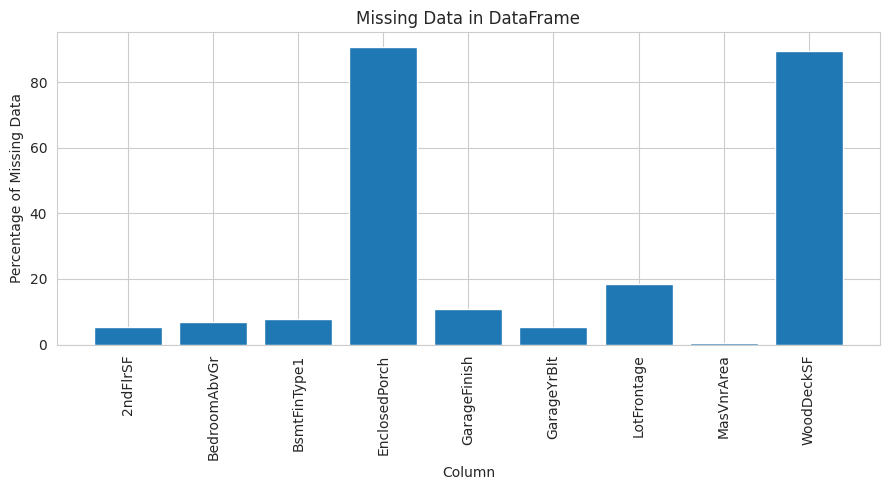

2ndFlrSF          7.534247
BedroomAbvGr      6.506849
BsmtFinType1      7.534247
EnclosedPorch    90.753425
GarageFinish     11.986301
GarageYrBlt       5.821918
LotFrontage      14.383562
MasVnrArea        0.684932
WoodDeckSF       88.356164
dtype: float64


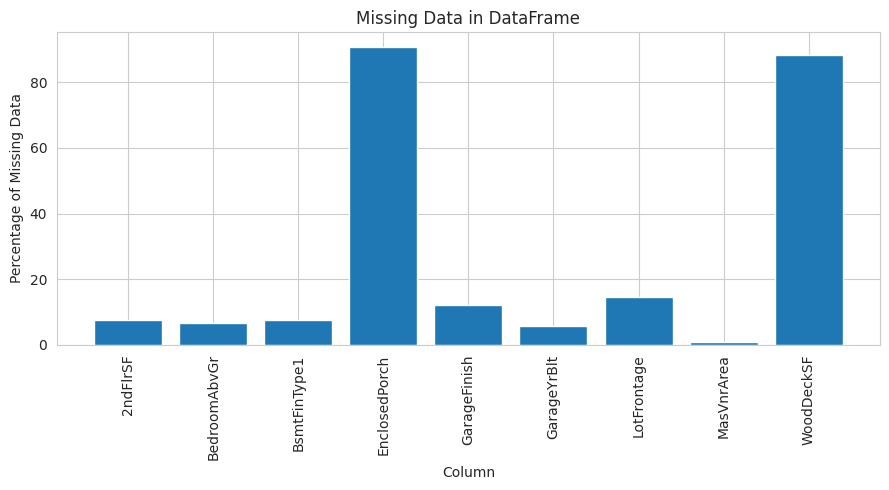

In [19]:
plot_percentage_missing(TrainSet)
plot_percentage_missing(TestSet)

We can see that the ratios are similar in each set.

## Assess Data Cleaning Effect

In [6]:
def DataCleaningEffect(df_original,df_cleaned,variables_applied_with_method):

  flag_count=1 # Indicate plot number
  
  # distinguish between numerical and categorical variables
  categorical_variables = df_original.select_dtypes(exclude=['number']).columns 

  # scan over variables, 
    # first on variables that you applied the method
    # if the variable is a numerical plot, a histogram if categorical plot a barplot
  for set_of_variables in [variables_applied_with_method]:
    print("\n=====================================================================================")
    print(f"* Distribution Effect Analysis After Data Cleaning Method in the following variables:")
    print(f"{set_of_variables} \n\n")
  

    for var in set_of_variables:
      if var in categorical_variables:  # it is categorical variable: barplot
        
        df1 = pd.DataFrame({"Type":"Original","Value":df_original[var]})
        df2 = pd.DataFrame({"Type":"Cleaned","Value":df_cleaned[var]})
        dfAux = pd.concat([df1, df2], axis=0)
        fig , axes = plt.subplots(figsize=(15, 5))
        sns.countplot(hue='Type', data=dfAux, x="Value",palette=['#432371',"#FAAE7B"])
        axes.set(title=f"Distribution Plot {flag_count}: {var}")
        plt.xticks(rotation=90)
        plt.legend() 

      else: # it is numerical variable: histogram

        fig , axes = plt.subplots(figsize=(10, 5))
        sns.histplot(data=df_original, x=var, color="#432371", label='Original', kde=True,element="step", ax=axes)
        sns.histplot(data=df_cleaned, x=var, color="#FAAE7B", label='Cleaned', kde=True,element="step", ax=axes)
        axes.set(title=f"Distribution Plot {flag_count}: {var}")
        plt.legend() 

      plt.show()
      flag_count+= 1

Series([], dtype: float64)


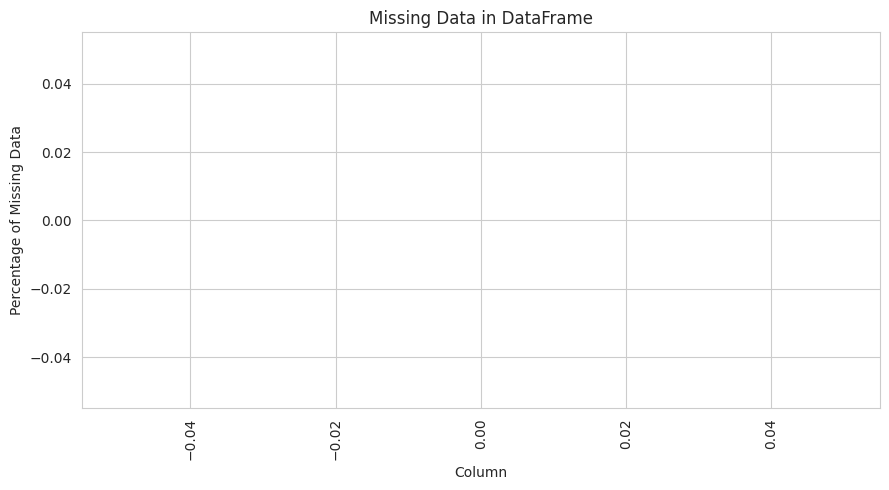

In [20]:
from feature_engine.selection import DropFeatures
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer

# Drop features
imputer = DropFeatures(features_to_drop=['WoodDeckSF', 'EnclosedPorch'])
df_dropped_na = imputer.fit_transform(TrainSet)

# Median Imputation
imputer = MeanMedianImputer(imputation_method='median', variables=['2ndFlrSF', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'BedroomAbvGr'])
df_median_imputed = imputer.fit_transform(df_dropped_na)

# Categorical Imputation
imputer = CategoricalImputer(imputation_method='missing', fill_value='None', variables=['BsmtFinType1', 'GarageFinish'])
df_cat_imputed = imputer.fit_transform(df_median_imputed)

plot_percentage_missing(df_cat_imputed)


* Distribution Effect Analysis After Data Cleaning Method in the following variables:
['2ndFlrSF', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'BedroomAbvGr', 'BsmtFinType1', 'GarageFinish'] 




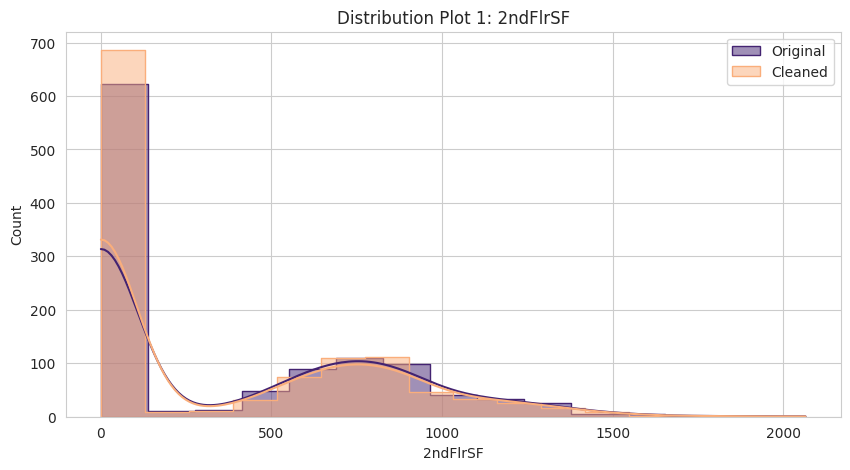

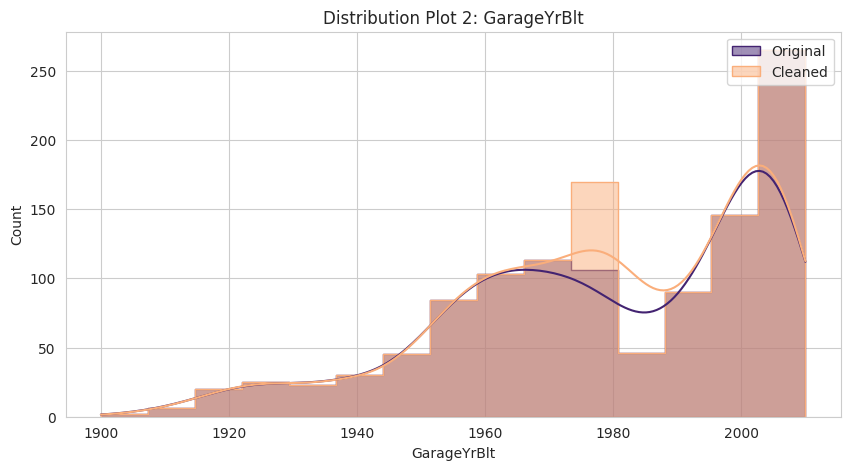

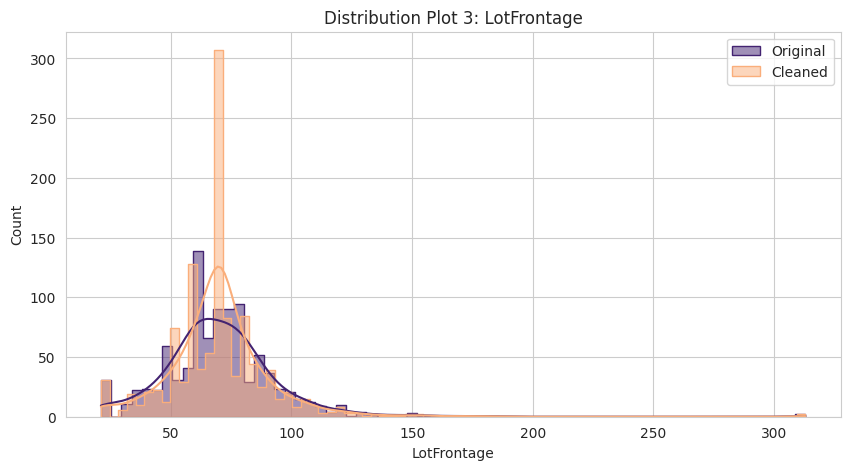

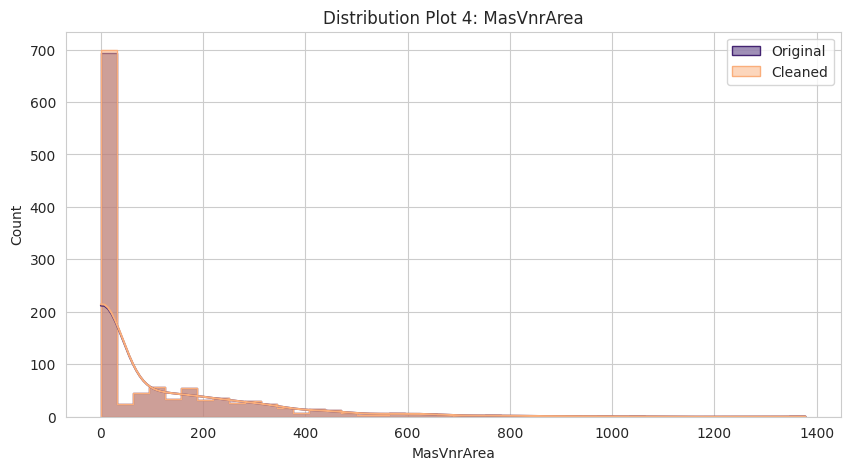

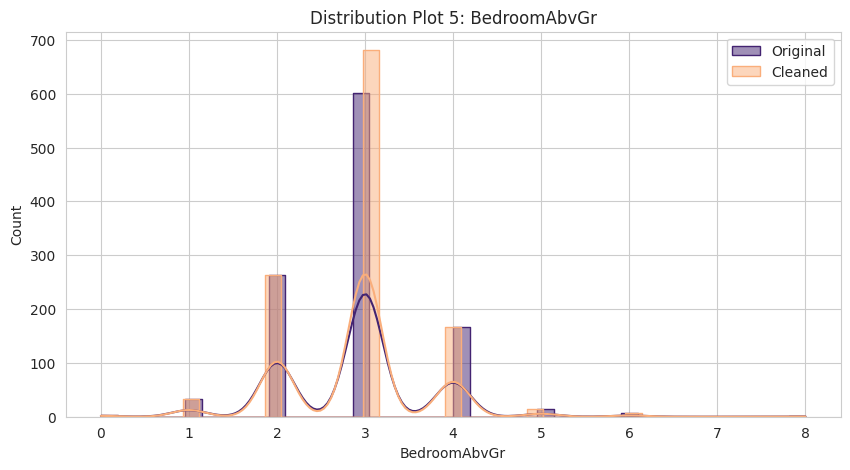

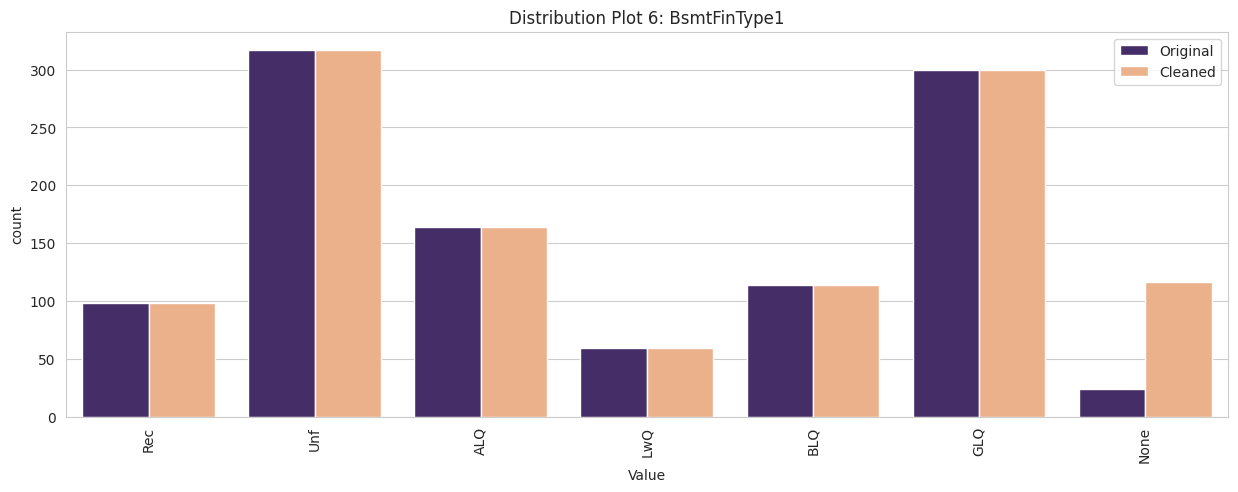

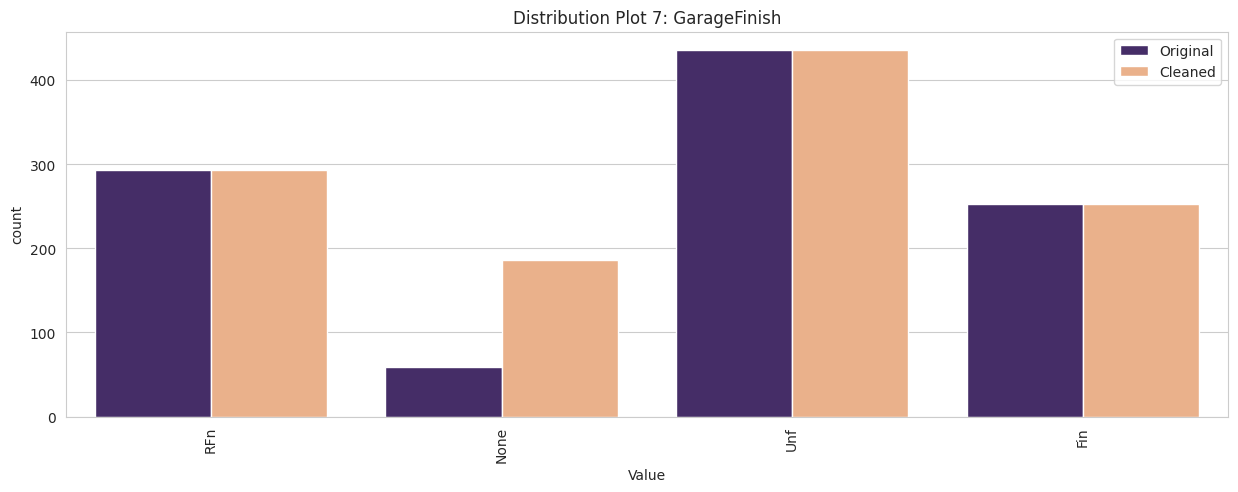

In [21]:
DataCleaningEffect(TrainSet, df_cat_imputed, ['2ndFlrSF', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'BedroomAbvGr','BsmtFinType1', 'GarageFinish'])

The distribution of variables remains largely as we expect. However, GarageYrBlt and LotFrontage are dramatically affected.

Given that we have another feature that provides information about the garage and does not have any missing values (GarageArea), it may be worth investigating if there is a relationship between the two.

In [22]:
missing_values_df = TrainSet[TrainSet['GarageYrBlt'].isnull()]
missing_values_df = missing_values_df[['GarageYrBlt', 'GarageArea']]

missing_values_df['GarageArea'].value_counts()

0    64
Name: GarageArea, dtype: int64

We can see that, for all instances of a missing value in GarageYrBlt, the GarageArea is 0.

This brings up an interesting issue - it appears that we need a 'none' option, which would involve converting GarageYrBlt to a categorical data type. However, this may limit the predictive power of the model as it would not recognise the dates as being related in any way (eg., 1999 is newer than 1975). We can consider using an arbitrary value that would be outside the usual range for years, such as 0, but this may also affect the model's prediction. In light of this, it may be best to drop the feature entirely, as we may assume that garage size would be a better predictor of sale price anyway.

Unfortunately, for LotFrontage, we do not have any supporting data so we will have to accept the new distribution.

Series([], dtype: float64)


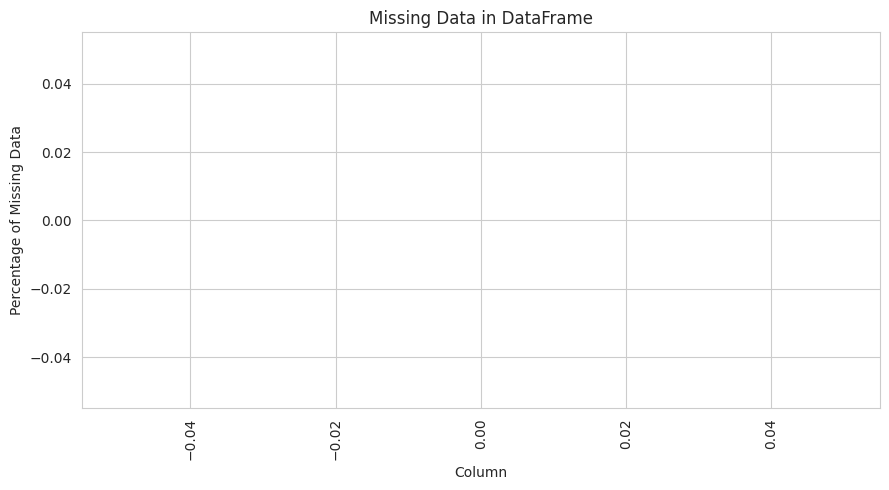

In [23]:
# Drop features
imputer = DropFeatures(features_to_drop=['WoodDeckSF', 'EnclosedPorch', 'GarageYrBlt'])
df_dropped_na = imputer.fit_transform(TrainSet)

# Median Imputation
imputer = MeanMedianImputer(imputation_method='median', variables=['2ndFlrSF', 'LotFrontage', 'MasVnrArea', 'BedroomAbvGr'])
df_median_imputed = imputer.fit_transform(df_dropped_na)

# Categorical Imputation
imputer = CategoricalImputer(imputation_method='missing', fill_value='None', variables=['BsmtFinType1', 'GarageFinish'])
df_cat_imputed = imputer.fit_transform(df_median_imputed)

plot_percentage_missing(df_cat_imputed)

## Data Cleaning Pipeline

Now we can combine all data cleaning steps into a pipeline, fit it to the train set, and transform both train and test sets.

In [24]:
from sklearn.pipeline import Pipeline

data_cleaning_pipeline = Pipeline([
    ('drop', DropFeatures(
        features_to_drop=['WoodDeckSF', 'EnclosedPorch', 'GarageYrBlt']
    )),
    ('median', MeanMedianImputer(
        imputation_method='median', 
        variables=['2ndFlrSF', 'LotFrontage', 'MasVnrArea', 'BedroomAbvGr']
    )),
    ('categorical', CategoricalImputer(
        imputation_method='missing', 
        fill_value='None', 
        variables=['BsmtFinType1', 'GarageFinish']
    ))  
])

In [25]:
data_cleaning_pipeline.fit(TrainSet)
TrainSet, TestSet = data_cleaning_pipeline.transform(TrainSet), data_cleaning_pipeline.transform(TestSet)

One last check to see if we missed anything:

Series([], dtype: float64)


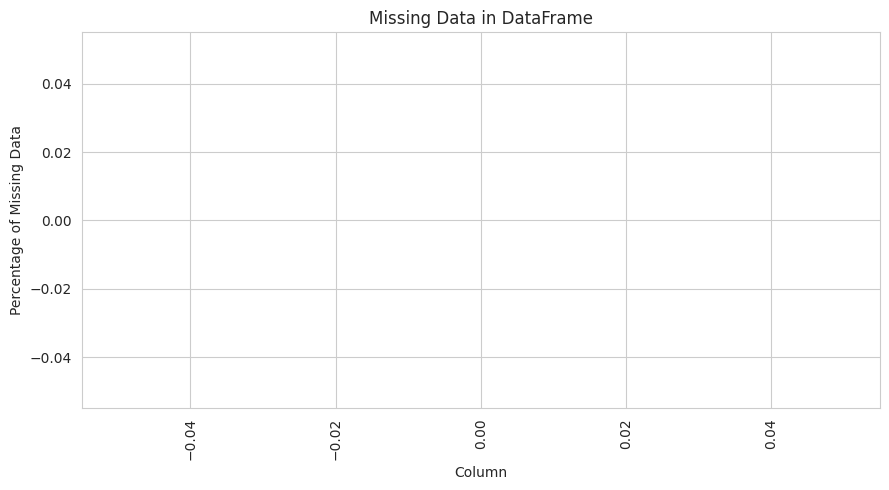

Series([], dtype: float64)


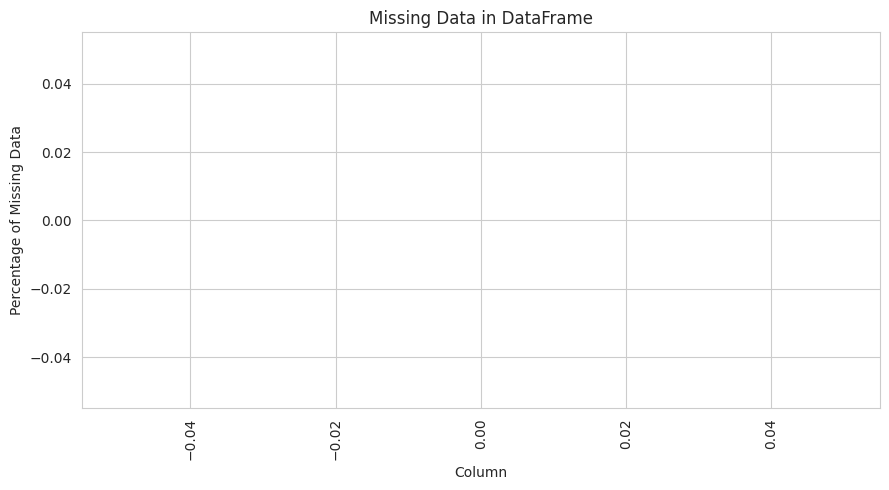

In [26]:
plot_percentage_missing(TrainSet)
plot_percentage_missing(TestSet)

There is no more missing data.

---

# Push files to Repo

In [27]:
import os
try:
  os.makedirs(name='outputs/datasets/cleaned')
except Exception as e:
  print(e)

In [28]:
TrainSet.to_csv('outputs/datasets/cleaned/TrainSetCleaned.csv')
TestSet.to_csv('outputs/datasets/cleaned/TestSetCleaned.csv')

---

# Conclusions

- A significant number of features included missing data that had to be dealt with in different ways:
    - Dropping features:
        - EnclosedPorch
        - WoodDeckSF
        - GarageYrBlt
    - Median imputation:
        - 2ndFlrSF
        - LotFrontage
        - MasVnrArea
        - BedroomAbvGr
    - Categorical imputation:
        - BsmtFinType1
        - GarageFinish